<a href="https://colab.research.google.com/github/KatieMears628/Washington_Real_Estate/blob/Katie_Mears_Branch/Final_Project_Draft2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandoc as pandoc

In [ ]:
import os 
os.getcwd()

'/cloud/project'

In [ ]:
cwd = os.getcwd()  # Get the current working directory (cwd)
files = os.listdir(cwd)  # Get all the files in that directory
print("Files in %r: %s" % (cwd, files))

Files in '/cloud/project': ['Final Project -Draft2.ipynb', '.ipynb_checkpoints', 'welcome.ipynb', 'Untitled.ipynb', 'Final Project .ipynb', '.kernels', 'house_sales.csv']


Libraries: 

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
import pandas as pd
import numpy as np
import scipy as sp
from scipy.stats import skewtest


In [ ]:
import matplotlib.pyplot as plt

Data Importing and Preprocessing 

In [ ]:
salesdata = pd.read_csv("house_sales.csv")

In [ ]:
salesdata.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3.0,1.00,1180.0,5650.0,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3.0,2.25,2570.0,7242.0,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2.0,1.00,770.0,10000.0,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4.0,3.00,1960.0,5000.0,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3.0,2.00,1680.0,8080.0,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
salesdata.tail()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,263000018,20140521T000000,360000.0,3.0,2.50,1530.0,1131.0,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4.0,2.50,2310.0,5813.0,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2.0,0.75,1020.0,1350.0,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3.0,2.50,1600.0,2388.0,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,20141015T000000,325000.0,2.0,0.75,1020.0,1076.0,2.0,0,0,...,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


In [ ]:
salesdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       20479 non-null  float64
 4   bathrooms      20545 non-null  float64
 5   sqft_living    20503 non-null  float64
 6   sqft_lot       20569 non-null  float64
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [ ]:
salesdata.describe()


,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,20479.000000,20545.000000,20503.000000,2.056900e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.372821,2.113507,2081.073697,1.517982e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930711,0.768913,915.043176,4.148617e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.500000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1920.000000,7.620000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.070800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,12050.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [ ]:
subset = salesdata[['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'yr_built', 'zipcode']]
subset.head()


,price,bedrooms,bathrooms,sqft_living,sqft_lot,yr_built,zipcode
0,221900.0,3.0,1.00,1180.0,5650.0,1955,98178
1,538000.0,3.0,2.25,2570.0,7242.0,1951,98125
2,180000.0,2.0,1.00,770.0,10000.0,1933,98028
3,604000.0,4.0,3.00,1960.0,5000.0,1965,98136
4,510000.0,3.0,2.00,1680.0,8080.0,1987,98074


In [ ]:
print(subset.dtypes)


price          float64
bedrooms       float64
bathrooms      float64
sqft_living    float64
sqft_lot       float64
yr_built         int64
zipcode          int64
dtype: object


In [ ]:
subset.count()

price          21613
bedrooms       20479
bathrooms      20545
sqft_living    20503
sqft_lot       20569
yr_built       21613
dtype: int64

In [ ]:
subset.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,yr_built
count,2.161300e+04,20479.000000,20545.000000,20503.000000,2.056900e+04,21613.000000
mean,5.400881e+05,3.372821,2.113507,2081.073697,1.517982e+04,1971.005136
std,3.671272e+05,0.930711,0.768913,915.043176,4.148617e+04,29.373411
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1900.000000
25%,3.219500e+05,3.000000,1.500000,1430.000000,5.040000e+03,1951.000000
50%,4.500000e+05,3.000000,2.250000,1920.000000,7.620000e+03,1975.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.070800e+04,1997.000000
max,7.700000e+06,33.000000,8.000000,12050.000000,1.651359e+06,2015.000000


In [ ]:
### Viewing Null Values - Total Null per Column
print(subset.isnull().sum())

price             0
bedrooms       1134
bathrooms      1068
sqft_living    1110
sqft_lot       1044
yr_built          0
zipcode           0
dtype: int64


In [ ]:
num_missing = subset.isna().sum().sum()

print(num_missing)

4356


In [ ]:
percentage = (4356 / 21613) * 100
rounded_pct = round(percentage, 2)
print(rounded_pct)


20.15


In [ ]:
### Removing Null data by Row 
data_clean = subset.dropna()
print(data_clean)

          price  bedrooms  bathrooms  sqft_living  sqft_lot  yr_built  zipcode
0      221900.0       3.0       1.00       1180.0    5650.0      1955    98178
1      538000.0       3.0       2.25       2570.0    7242.0      1951    98125
2      180000.0       2.0       1.00        770.0   10000.0      1933    98028
3      604000.0       4.0       3.00       1960.0    5000.0      1965    98136
4      510000.0       3.0       2.00       1680.0    8080.0      1987    98074
...         ...       ...        ...          ...       ...       ...      ...
21608  360000.0       3.0       2.50       1530.0    1131.0      2009    98103
21609  400000.0       4.0       2.50       2310.0    5813.0      2014    98146
21610  402101.0       2.0       0.75       1020.0    1350.0      2009    98144
21611  400000.0       3.0       2.50       1600.0    2388.0      2004    98027
21612  325000.0       2.0       0.75       1020.0    1076.0      2008    98144

[17618 rows x 7 columns]


In [ ]:
### Remove duplicate rows
data_clean2 = data_clean.drop_duplicates()
print(data_clean2)

          price  bedrooms  bathrooms  sqft_living  sqft_lot  yr_built  zipcode
0      221900.0       3.0       1.00       1180.0    5650.0      1955    98178
1      538000.0       3.0       2.25       2570.0    7242.0      1951    98125
2      180000.0       2.0       1.00        770.0   10000.0      1933    98028
3      604000.0       4.0       3.00       1960.0    5000.0      1965    98136
4      510000.0       3.0       2.00       1680.0    8080.0      1987    98074
...         ...       ...        ...          ...       ...       ...      ...
21608  360000.0       3.0       2.50       1530.0    1131.0      2009    98103
21609  400000.0       4.0       2.50       2310.0    5813.0      2014    98146
21610  402101.0       2.0       0.75       1020.0    1350.0      2009    98144
21611  400000.0       3.0       2.50       1600.0    2388.0      2004    98027
21612  325000.0       2.0       0.75       1020.0    1076.0      2008    98144

[17613 rows x 7 columns]


In [ ]:
### Check the number of unique values in a column
print(data_clean2['price'].nunique())
print(data_clean2['bedrooms'].nunique())
print(data_clean2['bathrooms'].nunique())
print(data_clean2['sqft_living'].nunique())
print(data_clean2['sqft_lot'].nunique())
print(data_clean2['yr_built'].nunique())
print(data_clean2['zipcode'].nunique())

3574
12
29
950
8530
116
70


In [ ]:
### If the number of unique values in a column is large, the distribution of values is skewed, 
### or the granularity of the data is too fine-grained, you may need to aggregate the data. 
### Similarly, if the dataset is very large, aggregation may be necessary to reduce the size of the dataset
### for easier analysis or visualization.

In [ ]:
### Check the distribution of values in a column
print(data_clean2['price'].value_counts())
print(data_clean2['bedrooms'].value_counts())
print(data_clean2['bathrooms'].value_counts())
print(data_clean2['sqft_living'].value_counts())
print(data_clean2['sqft_lot'].value_counts())
print(data_clean2['yr_built'].value_counts())
print(data_clean2['zipcode'].value_counts())

450000.0     143
350000.0     135
550000.0     126
500000.0     125
400000.0     122
            ... 
2538000.0      1
1445000.0      1
738500.0       1
507200.0       1
402101.0       1
Name: price, Length: 3574, dtype: int64
3.0     7957
4.0     5610
2.0     2266
5.0     1333
6.0      233
1.0      158
7.0       29
8.0       10
0.0        9
9.0        4
10.0       3
33.0       1
Name: bedrooms, dtype: int64
2.50    4406
1.00    3146
1.75    2475
2.25    1680
2.00    1569
1.50    1176
2.75     946
3.00     616
3.50     582
3.25     476
3.75     135
4.00     109
4.50      79
4.25      67
0.75      60
4.75      23
5.00      17
5.25      10
5.50      10
1.25       7
0.00       6
6.00       5
0.50       4
6.25       2
5.75       2
6.50       2
8.00       1
6.75       1
7.50       1
Name: bathrooms, dtype: int64
1300.0    117
1400.0    113
1440.0    112
1800.0    110
1010.0    107
         ... 
5844.0      1
2507.0      1
4530.0      1
5720.0      1
1425.0      1
Name: sqft_living, Length: 

In [ ]:
# Check the size of the dataset
print(data_clean2.shape)

(17613, 7)


In [ ]:
# Check the granularity of the data
print(data_clean2['price'].min(), data_clean2['price'].max())
print(data_clean2['bedrooms'].min(), data_clean2['bedrooms'].max())
print(data_clean2['bathrooms'].min(), data_clean2['bathrooms'].max())
print(data_clean2['sqft_living'].min(), data_clean2['sqft_living'].max())
print(data_clean2['sqft_lot'].min(), data_clean2['sqft_lot'].max())
print(data_clean2['yr_built'].min(), data_clean2['yr_built'].max())
print(data_clean2['zipcode'].min(), data_clean2['zipcode'].max())

75000.0 7700000.0
0.0 33.0
0.0 8.0
370.0 12050.0
520.0 1651359.0
1900 2015
98001 98199


In [ ]:
### Calculate the skewness of a column
### Skewness from Pandas:
### The skew() function in Pandas can be used to calculate the skewness of a sample distribution. The function returns a value 
### that indicates the degree of skewness. If the value is positive, the distribution is skewed to the right (i.e., it has a 
### long right tail). If the value is negative, the distribution is skewed to the left (i.e., it has a long left tail). If the 
### value is close to zero, the distribution is approximately symmetric.

In [ ]:
df = pd.DataFrame(data_clean2)
skewness = df.skew()
summary = pd.DataFrame({'Skewness': skewness})
print(summary)

              Skewness
price         3.915629
bedrooms      2.246017
bathrooms     0.491070
sqft_living   1.406670
sqft_lot     13.438664
yr_built     -0.455684
zipcode       0.398936


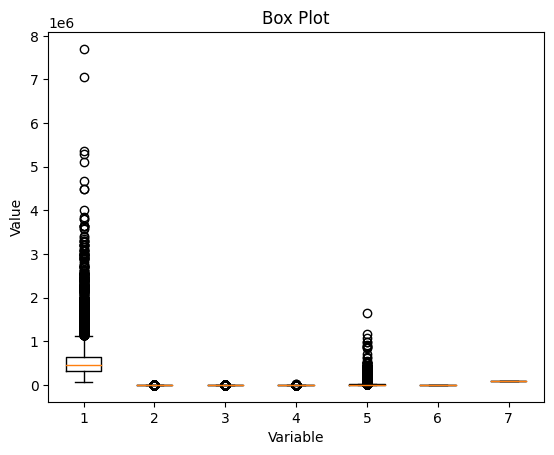

In [ ]:
# Create a box plot

fig, ax = plt.subplots()
ax.boxplot(data_clean2)
ax.set_xlabel('Variable')
ax.set_ylabel('Value')
ax.set_title('Box Plot')
plt.show()

In [ ]:
### Home price and sqft_lot have many outliers. 

In [ ]:
### Normalization is the process of scaling numeric data to a common range. It is a common preprocessing step in machine 
### learning to improve the performance of models that use distance-based measures.
### In Python, you can perform normalization using various libraries such as Scikit-learn, NumPy, and Pandas.

In [ ]:
# Create a MinMaxScaler object
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(data_clean2)
print(normalized_data)

[[1.92655738e-02 9.09090909e-02 1.25000000e-01 ... 3.10751079e-03
  4.78260870e-01 8.93939394e-01]
 [6.07213115e-02 9.09090909e-02 2.81250000e-01 ... 4.07186891e-03
  4.43478261e-01 6.26262626e-01]
 [1.37704918e-02 6.06060606e-02 1.25000000e-01 ... 5.74253455e-03
  2.86956522e-01 1.36363636e-01]
 ...
 [4.28984918e-02 6.06060606e-02 9.37500000e-02 ... 5.02774650e-04
  9.47826087e-01 7.22222222e-01]
 [4.26229508e-02 9.09090909e-02 3.12500000e-01 ... 1.13154584e-03
  9.04347826e-01 1.31313131e-01]
 [3.27868852e-02 6.06060606e-02 9.37500000e-02 ... 3.36798440e-04
  9.39130435e-01 7.22222222e-01]]


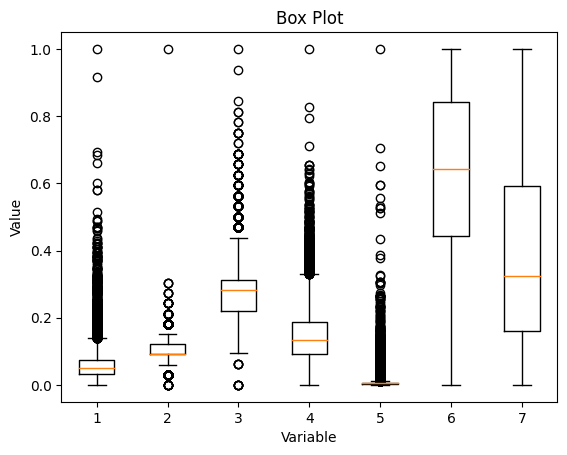

In [ ]:
# Create a box plot of Normalized Data

fig, ax = plt.subplots()
ax.boxplot(normalized_data)
ax.set_xlabel('Variable')
ax.set_ylabel('Value')
ax.set_title('Box Plot')
plt.show()